# Fashion MNIST - CNN v1
- 2 x Conv2D layers
- 1 MaxPooling2D layer
- 1 Dropout(0.25) layer
- 1 FCN layer
- 1 Dropout(0.5) layer
- 1 Output layer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape, y_train.shape, X_test.shape,y_test.shape

4431872/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

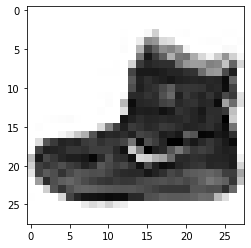

In [4]:
plt.imshow(X_train[0], cmap='Greys');

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


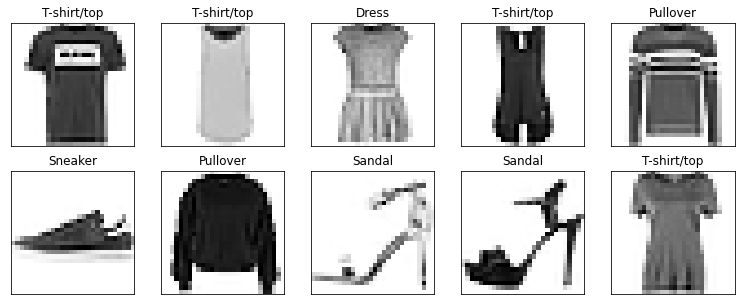

In [6]:
plt.figure(figsize=(13, 5))
for i in range(1, 11):
    plt.subplot(2, 5, i)
    plt.imshow(X_train[i], cmap='Greys');
    plt.title(class_names[y_train[i]])
    plt.xticks([]), plt.yticks([])
plt.show()

In [7]:
# X_train, X_test 정규화(0 ~ 1) & 이미지 차원 변경 : 2차원 --> 3차원
X_train = X_train.reshape(-1, 28, 28, 1) / 255.
X_test = X_test.reshape(-1, 28, 28, 1) / 255.
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [8]:
# One hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

- 모델 정의/설정/학습/평가

In [9]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [10]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation = 'relu'),
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D(),         # MaxPooling2D(pool_size = (2, 2))
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 512)               4719104   
                                                        

In [11]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [12]:
model_path = 'best-fashion-mnist-cnn-v1.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

In [13]:
hist = model.fit(
    X_train, Y_train, validation_split=0.2, epochs=100, batch_size=200,
    callbacks=[mc, es]
)

Epoch 1/100
240/240 [==============================] - ETA: 0s - loss: 0.5020 - accuracy: 0.8216
Epoch 1: val_loss improved from inf to 0.32117, saving model to best-fashion-mnist-cnn-v1.h5
240/240 [==============================] - 14s 15ms/step - loss: 0.5020 - accuracy: 0.8216 - val_loss: 0.3212 - val_accuracy: 0.8824
Epoch 2/100
239/240 [============================>.] - ETA: 0s - loss: 0.3137 - accuracy: 0.8871
Epoch 2: val_loss improved from 0.32117 to 0.27732, saving model to best-fashion-mnist-cnn-v1.h5
240/240 [==============================] - 3s 14ms/step - loss: 0.3136 - accuracy: 0.8871 - val_loss: 0.2773 - val_accuracy: 0.8982
Epoch 3/100
239/240 [============================>.] - ETA: 0s - loss: 0.2611 - accuracy: 0.9053
Epoch 3: val_loss improved from 0.27732 to 0.23873, saving model to best-fashion-mnist-cnn-v1.h5
240/240 [==============================] - 3s 14ms/step - loss: 0.2613 - accuracy: 0.9052 - val_loss: 0.2387 - val_accuracy: 0.9106
Epoch 4/100
239/240 [====

In [14]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2157 - accuracy: 0.9269


[0.2157270759344101, 0.9269000291824341]

- 학습과정 시각화

In [15]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc) + 1)

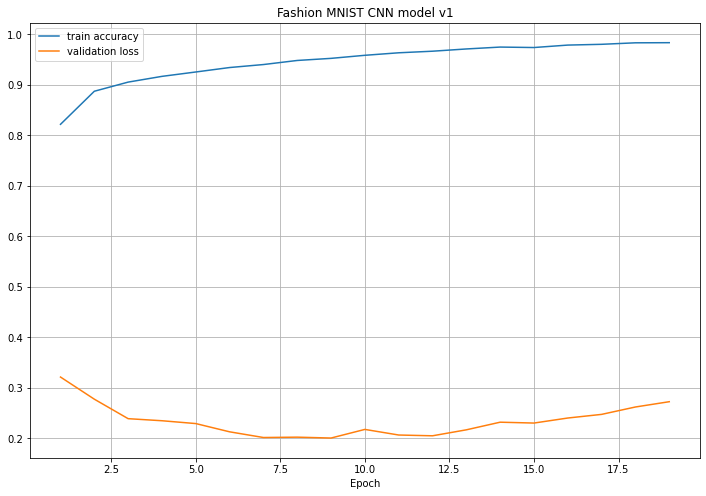

In [16]:
plt.figure(figsize = (12, 8))
plt.plot(xs, y_acc, label = 'train accuracy')
plt.plot(xs, y_vloss, label = 'validation loss')
plt.legend(), plt.grid()
plt.xlabel('Epoch')
plt.title('Fashion MNIST CNN model v1')
plt.show()